<a href="https://colab.research.google.com/github/Harrisson3/diabetes/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB
None

First five rows of the dataset:
   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0 

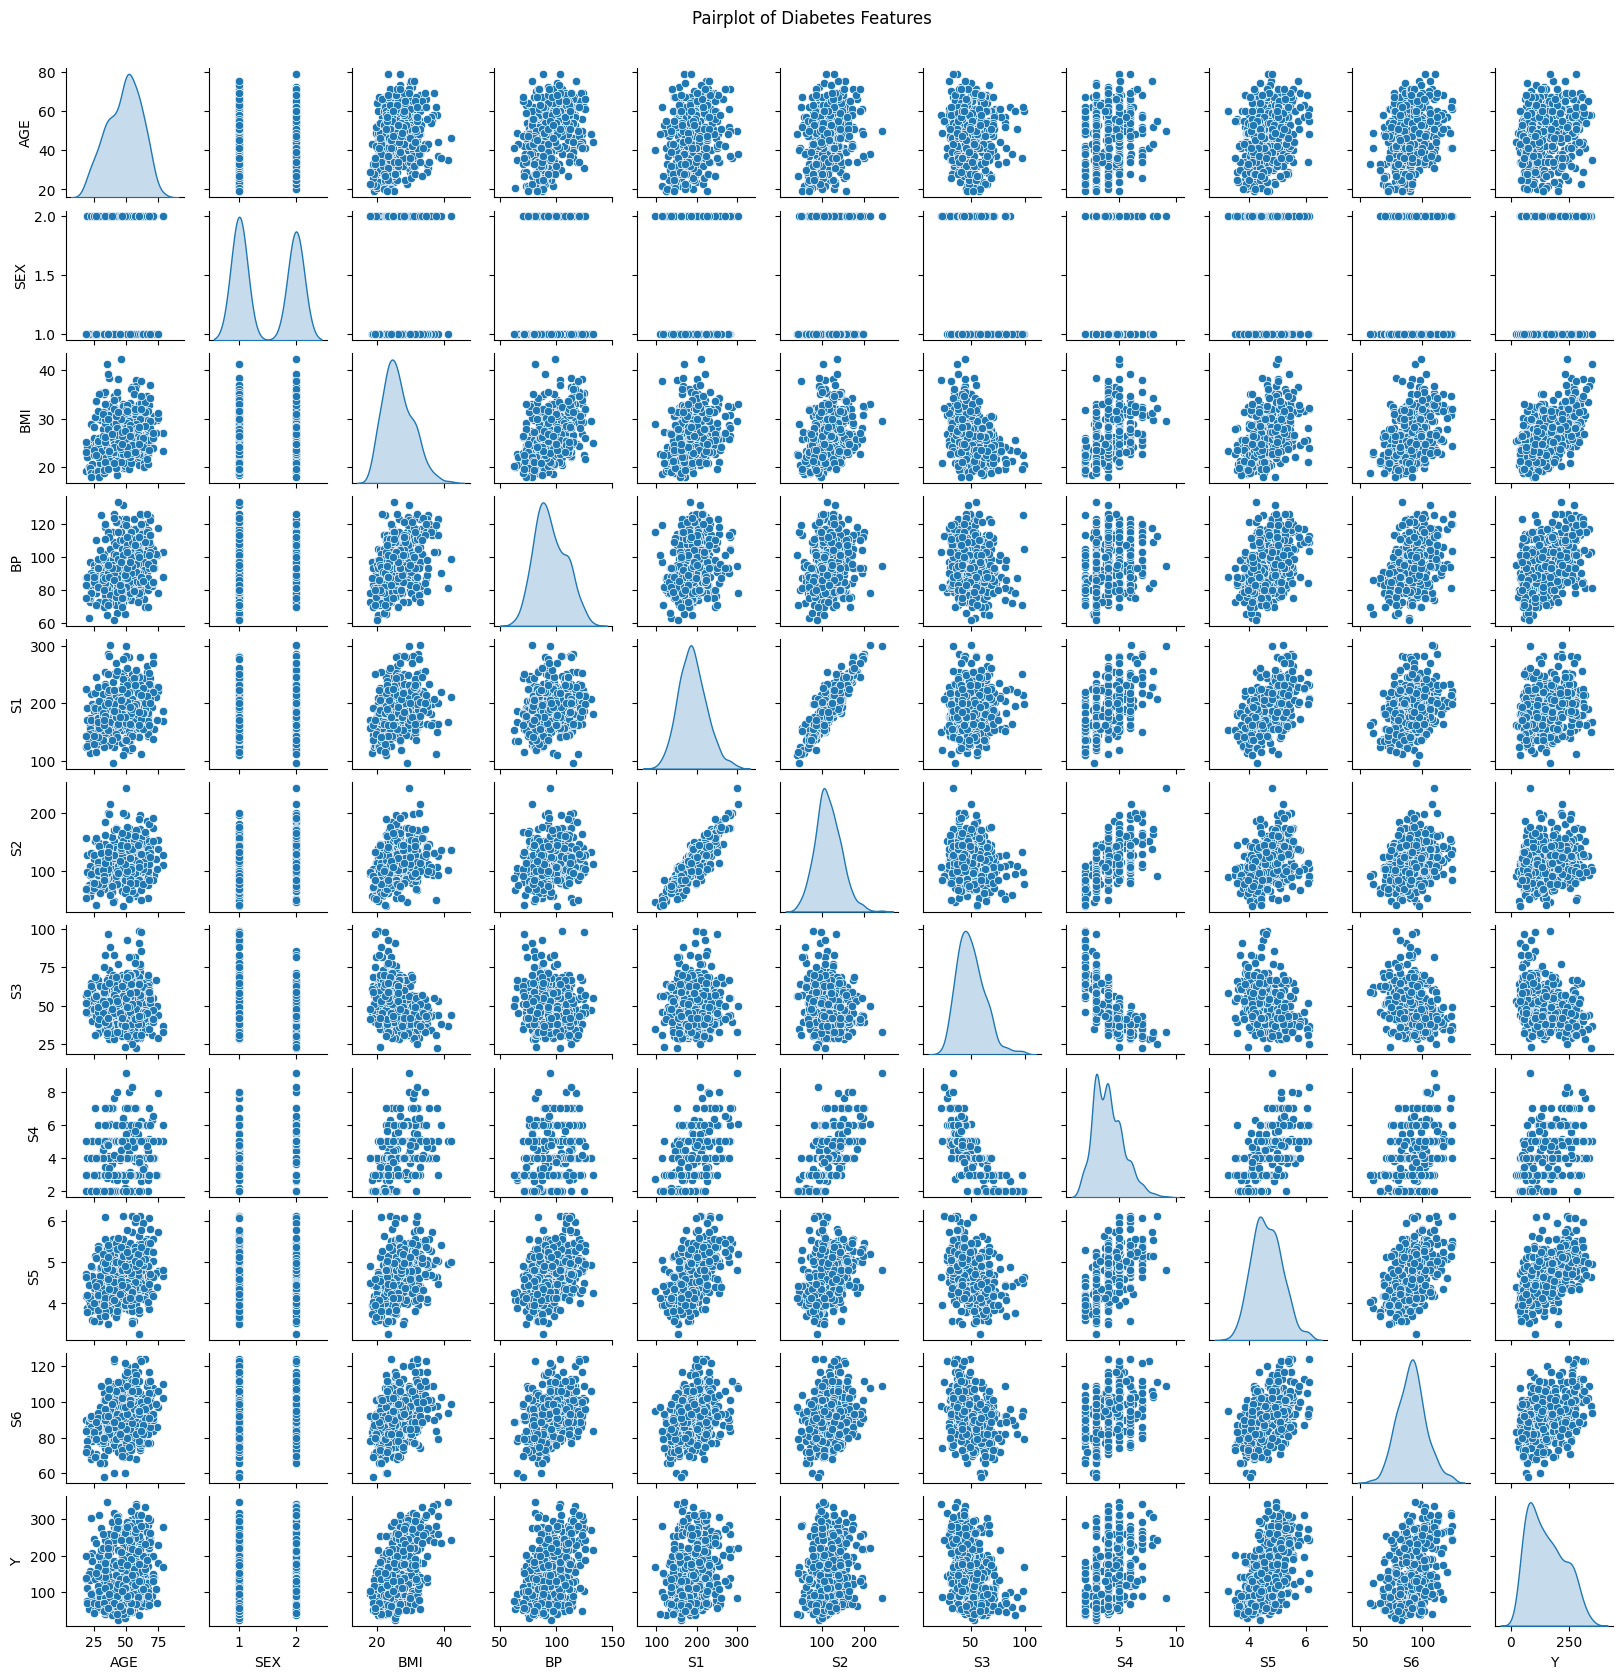

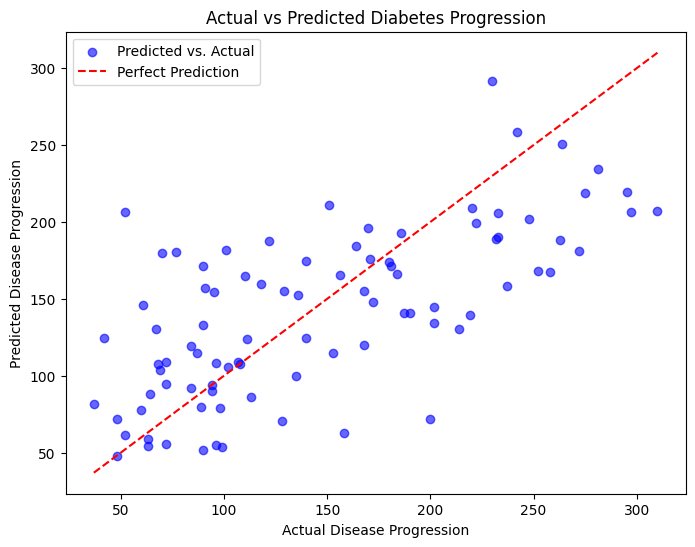

Mean Squared Error (MSE): 2900.19
Root Mean Squared Error (RMSE): 53.85
R-squared (R²): 0.4526

Feature Importance (Regression Coefficients):
S5     67.108962
S4     10.159539
BMI     5.846363
BP      1.197093
S2      0.811152
S3      0.601653
S6      0.201599
AGE     0.137688
S1     -1.281685
SEX   -23.064468
dtype: float64


<ipython-input-1-00e60002beb0>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="coolwarm")


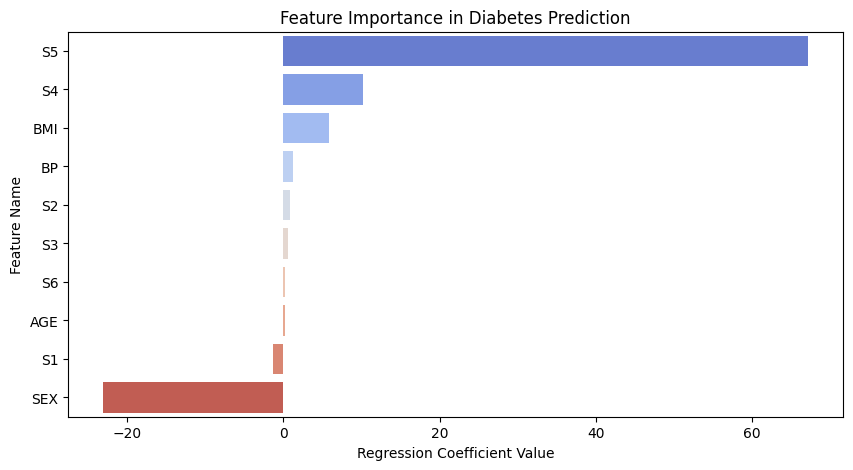

In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the dataset
url = "https://github.com/Harrisson3/diabetes/raw/main/diabetes.xlsx"
df = pd.read_excel(url)

# Step 3: Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

print("\nFirst five rows of the dataset:")
print(df.head())

# Step 4: Explore the Data with Pandas
print("\nSummary statistics of the dataset:")
print(df.describe())

# Step 5: Visualizing the Features
sns.pairplot(df, diag_kind='kde', height=1.5)
plt.suptitle("Pairplot of Diabetes Features", y=1.02)
plt.show()

# Step 6: Splitting the Data for Training and Testing
X = df.drop(columns=['Y'])  # Features (drop the target variable)
y = df['Y']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Test the Model (Make Predictions)
y_pred = model.predict(X_test)

# Step 9: Visualizing the Expected vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs. Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Perfect Prediction")
plt.xlabel("Actual Disease Progression")
plt.ylabel("Predicted Disease Progression")
plt.title("Actual vs Predicted Diabetes Progression")
plt.legend()
plt.show()

# Step 10: Regression Model Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Step 11: Choosing the Best Model (Feature Importance Analysis)
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance (Regression Coefficients):")
print(feature_importance)

# Visualizing Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="coolwarm")
plt.xlabel("Regression Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Diabetes Prediction")
plt.show()
